In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

C:\Users\hp\AppData\Local\Temp\ipykernel_32836\883536205.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
warnings.simplefilter('ignore')

In [4]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
data_train.shape

(1258, 6)

In [6]:
data_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
data_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [8]:
data = data_train.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
data_scaled = sc.fit_transform(data)

In [9]:
x_train = []
y_train =[]

for i in range(60,1258):
    x_train.append(data_scaled[i-60:i,0])
    y_train.append(data_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)   
#reshaping 
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [12]:
data_train['Date']=pd.to_datetime(data_train['Date'])
data_train.set_index('Date',drop=True,inplace=True)
data_train['Volume'] = data_train['Volume'].str.replace(',', '').astype(float)
data_train['Close'] = data_train['Close'].str.replace(',', '').astype(float)

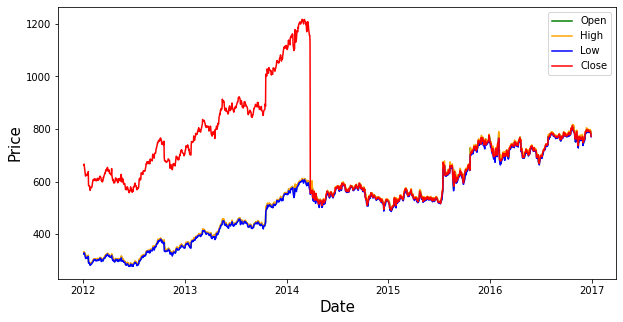

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_train['Open'], label='Open', color='green')
ax.plot(data_train['High'], label='High', color='orange')
ax.plot(data_train['Low'],label='Low',color='blue')
ax.plot(data_train['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()

fig.show()

In [19]:
data_train['Close'] = data_train.apply(lambda x: x['Close']/2 if x['Close'] > x['High'] else x['Close'], axis=1)

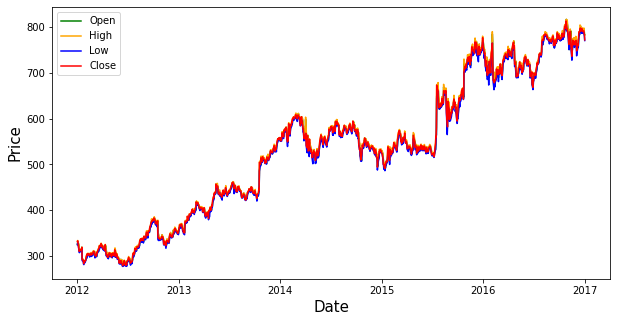

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_train['Open'], label='Open', color='green')
ax.plot(data_train['High'], label='High', color='orange')
ax.plot(data_train['Low'],label='Low',color='blue')
ax.plot(data_train['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()

fig.show()

### MOdelling

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
regressor = Sequential()

In [23]:
regressor.add(LSTM(units =50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding 2nd layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#adding 3rd layer 
regressor.add(LSTM(units =50,return_sequences = True))
regressor.add(Dropout(0.2))

#adding fourth layer
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(Dense(units =1)) #output layer
regressor.compile(optimizer = 'adam' ,loss = 'mean_squared_error') # compiling model

In [25]:
regressor.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
regressor.fit(x_train,y_train,epochs = 100,batch_size =32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0920
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0066
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0061
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0052
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0045
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0051
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0044
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0048
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0051
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0037
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0042
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0034
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0046
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - lo

In [27]:
data_test_stock = data_test.iloc[:,1:2]

In [28]:
dataset = pd.concat((data_train['Open'],data_test['Open']),axis =0)
inputs = dataset[len(dataset)-len(data_test)-60:].values
inputs =inputs.reshape(-1,1)
inputs =sc.transform(inputs)

x_test =[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [29]:
predict_price = regressor.predict(x_test)                 
predict_price = sc.inverse_transform(predict_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


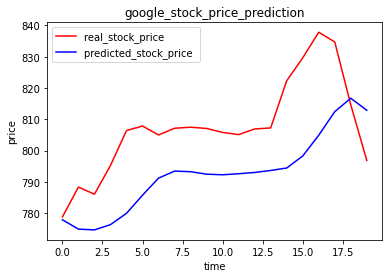

In [30]:
plt.plot(data_test_stock,color='red',label = 'real_stock_price ')
plt.plot(predict_price,color='blue',label = 'predicted_stock_price ')
plt.title('google_stock_price_prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

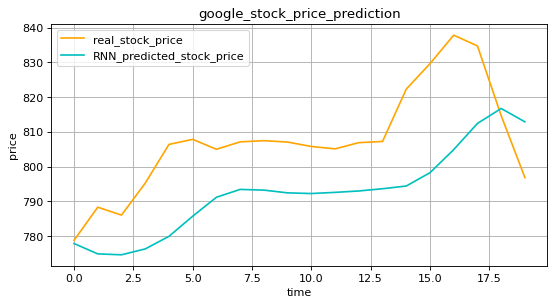

In [31]:
# Same plotting in grid
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test_stock,color="orange",label="real_stock_price")
plt.plot(predict_price,color="c",label="RNN_predicted_stock_price")
plt.title('google_stock_price_prediction')
plt.legend()
plt.xlabel("time")
plt.ylabel("price")
plt.grid(True)
plt.show()